# Understanding Yelp Dataset

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from IPython.core.display import display

## Business Data

Let's import our first dataset using Pandas `read_json` function. Note that with version 0.19, you can use `lines=True` to get rid of that annoying `trailing line` error that we used to have.

In [2]:
business_df = pd.read_json(
    '../dataset/yelp_academic_dataset_business.json',
    lines=True)

A quick overview of the dataset using the `head` function gives:

In [7]:
business_df.head()

,attributes,business_id,categories,city,full_address,hours,latitude,longitude,name,neighborhoods,open,review_count,stars,state,type
0,"{u'Take-out': True, u'Drive-Thru': False, u'Ou...",5UmKMjUEUNdYWqANhGckJw,"[Fast Food, Restaurants]",Dravosburg,"4734 Lebanon Church Rd\nDravosburg, PA 15034","{u'Tuesday': {u'close': u'21:00', u'open': u'1...",40.354327,-79.900706,Mr Hoagie,[],True,7,3.5,PA,business
1,"{u'Happy Hour': True, u'Accepts Credit Cards':...",UsFtqoBl7naz8AVUBZMjQQ,[Nightlife],Dravosburg,"202 McClure St\nDravosburg, PA 15034",{},40.350553,-79.886814,Clancy's Pub,[],True,5,3.0,PA,business
2,{u'Good for Kids': True},cE27W9VPgO88Qxe4ol6y_g,"[Active Life, Mini Golf, Golf]",Bethel Park,"1530 Hamilton Rd\nBethel Park, PA 15234",{},40.354115,-80.014660,Cool Springs Golf Center,[],False,5,2.5,PA,business
3,"{u'Alcohol': u'full_bar', u'Noise Level': u'av...",mVHrayjG3uZ_RLHkLj-AMg,"[Bars, American (New), Nightlife, Lounges, Res...",Braddock,"414 Hawkins Ave\nBraddock, PA 15104","{u'Tuesday': {u'close': u'19:00', u'open': u'1...",40.408830,-79.866211,Emil's Lounge,[],True,26,4.5,PA,business
4,"{u'Takes Reservations': True, u'Accepts Credit...",mYSpR_SLPgUVymYOvTQd_Q,"[Active Life, Golf]",Braddock,"1000 Clubhouse Dr\nBraddock, PA 15104","{u'Sunday': {u'close': u'15:00', u'open': u'10...",40.403405,-79.855782,Grand View Golf Club,[],True,3,5.0,PA,business


Let's dive in a bit more, what numerical data do we have? `describe` can tell us that.  

In [6]:
business_df.describe()

,latitude,longitude,review_count,stars
count,85901.000000,85901.000000,85901.000000,85901.000000
mean,37.034786,-99.107318,34.352359,3.694852
std,5.389208,27.437773,108.677591,0.946045
min,32.865882,-115.386550,3.000000,1.000000
25%,33.506767,-115.062628,5.000000,3.000000
50%,35.314392,-111.943739,10.000000,4.000000
75%,36.203094,-80.951101,26.000000,4.500000
max,56.033777,8.549249,6200.000000,5.000000


`latitude` and `longitude` are not really useful here, but `stars` and `review_count` are. Here is what we can tell from here:

- We have 85901 businesses
- Their average rating is 3.69, on a 1 to 5 scale. 25% of them are rated below 3, 50% below 4 and 75% below 4.5. 
- The average number of reviews per business is about 34, and range from 3 to 6200. 25% have less than 5 reviews, and 25% have more than 26 reviews. 

Let's now have a look at the non numerical data. Here are the columns of our DataFrame:

In [14]:
business_df.columns.tolist()

[u'attributes',
 u'business_id',
 u'categories',
 u'city',
 u'full_address',
 u'hours',
 u'latitude',
 u'longitude',
 u'name',
 u'neighborhoods',
 u'open',
 u'review_count',
 u'stars',
 u'state',
 u'type']

Let's see how these businesses are spread accross the states:

In [27]:
business_df['state'].value_counts()

AZ     36500
NV     23591
NC      6835
QC      5591
PA      4086
EDH     3297
WI      3066
BW      1055
IL       808
ON       530
SC       325
MLN      161
RP        18
ELN       11
FIF        5
CA         4
TX         3
SCB        2
FL         2
HAM        1
AL         1
MN         1
AK         1
NW         1
NM         1
XGL        1
TAM        1
NTH        1
KHL        1
           1
Name: state, dtype: int64

Pandas makes it easy to do visualization with the [`plot`](http://pandas.pydata.org/pandas-docs/version/0.19.2/generated/pandas.DataFrame.plot.html) function on DataFrames. 

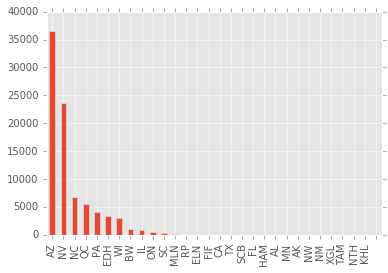

In [28]:
%matplotlib inline
display(business_df['state'].value_counts().plot(kind='bar'))

How many of these businesses are open vs. close ?

In [26]:
business_df['open'].value_counts()

True     73211
False    12690
Name: open, dtype: int64

What categories are they ?

In [55]:
business_df['categories'].value_counts().head()

[Mexican, Restaurants]          1680
[Pizza, Restaurants]            1298
[Food, Coffee & Tea]            1206
[Beauty & Spas, Nail Salons]    1183
[Hair Salons, Beauty & Spas]    1127
Name: categories, dtype: int64

Ugh that's not really how we wanted our categories, we should split those arrays ... Thanks to [this](http://stackoverflow.com/a/29036042) stackoverflow response and some tweaking, we can plot the 10 largest categories:

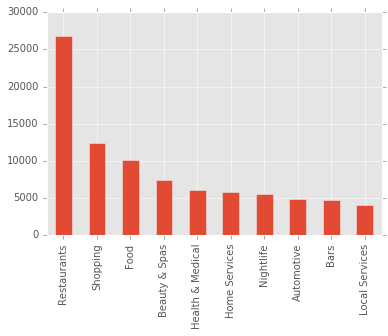

In [54]:
%matplotlib inline

pd.get_dummies(business_df['categories'].apply(pd.Series).stack())\
    .sum(level=0)\
    .sum()\
    .sort_values(ascending=False)\
    .head(10)\
    .plot(kind='bar')

## Users

In [8]:
users_df = pd.read_json(
    '../dataset/yelp_academic_dataset_user.json',
    lines=True)

In [9]:
users_df.head()

,average_stars,compliments,elite,fans,friends,name,review_count,type,user_id,votes,yelping_since
0,4.14,"{u'profile': 8, u'cute': 15, u'funny': 11, u'p...","[2005, 2006]",69,"[rpOyqD_893cqmDAtJLbdog, 4U9kSBLuBDU391x6bxU-Y...",Russel,108,user,18kPq7GPye-YQ3LyKyAZPw,"{u'funny': 167, u'useful': 282, u'cool': 246}",2004-10
1,3.67,"{u'profile': 117, u'cute': 204, u'funny': 594,...","[2005, 2006, 2007, 2008, 2009, 2010, 2011, 201...",1345,"[18kPq7GPye-YQ3LyKyAZPw, 4U9kSBLuBDU391x6bxU-Y...",Jeremy,1292,user,rpOyqD_893cqmDAtJLbdog,"{u'funny': 8399, u'useful': 15242, u'cool': 12...",2004-10
2,3.68,"{u'profile': 9, u'cute': 22, u'funny': 96, u'p...","[2005, 2006, 2007, 2008, 2009, 2010, 2011, 201...",105,"[18kPq7GPye-YQ3LyKyAZPw, rpOyqD_893cqmDAtJLbdo...",Michael,395,user,4U9kSBLuBDU391x6bxU-YA,"{u'funny': 722, u'useful': 1349, u'cool': 657}",2004-10
3,4.64,{u'cute': 2},[],2,"[18kPq7GPye-YQ3LyKyAZPw, rpOyqD_893cqmDAtJLbdo...",Ken,11,user,fHtTaujcyKvXglE33Z5yIw,"{u'funny': 1, u'useful': 11, u'cool': 5}",2004-10
4,3.80,"{u'cute': 2, u'plain': 2, u'writer': 2, u'note...",[2005],5,"[rpOyqD_893cqmDAtJLbdog, HDQixQ-WZEV0LVPJlIGQe...",Katherine,66,user,SIBCL7HBkrP4llolm4SC2A,"{u'funny': 13, u'useful': 37, u'cool': 16}",2004-10


In [10]:
users_df.describe()

,average_stars,fans,review_count
count,686556.000000,686556.000000,686556.000000
mean,3.746704,1.290100,25.757102
std,1.086832,11.501621,83.755973
min,0.000000,0.000000,0.000000
25%,3.230000,0.000000,2.000000
50%,3.920000,0.000000,5.000000
75%,4.600000,0.000000,17.000000
max,5.000000,3549.000000,10897.000000
